# 1. Project Overview

Customer churn refers to the rate at which customers stop using a company’s services over a specific period. In the telecom industry, churn is a critical metric because retaining customers is far more cost-effective than acquiring new ones. High churn often signals deeper issues such as poor service experience, increased competition, or weak customer engagement.

This project analyzes the **Telco Customer Churn Dataset** from Kaggle to uncover the factors that drive customer attrition and identify which customers are most likely to leave. By understanding these patterns, telecom providers can design targeted retention strategies that improve customer satisfaction and long-term profitability.

## Project Goal

To explore customer behavior and account characteristics to:

- **Identify the strongest drivers of churn**
- **Understand which customer groups are most at risk**
- **Generate actionable insights for data-driven retention decisions**

## Data Source

The dataset used in this analysis comes from **Kaggle**:

- **Dataset Name:** Telco Customer Churn  
- **Source:** [Kaggle - Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)  
- **Description:** Contains customer account information, services subscribed, billing details, and churn status.  
- **Notes:** Ensure that the dataset version matches the one used for reproducibility. 


# 2. Business Problem Summary

## Problem

High customer churn directly impacts revenue. Since acquiring new customers is more expensive than retaining existing ones, telecom providers must understand why customers leave and how to intervene early.

## Objective

Use exploratory analysis to uncover the key factors influencing customer churn and identify which customers show the highest likelihood of leaving.

## Key Business Questions

- Which customer segments are most at risk of churning?
- How do contract type, service usage, and pricing affect churn?
- What insights can guide targeted retention strategies?

## Expected Impact

By answering these questions, telecom companies can:

- Prioritize high-risk customers for retention campaigns  
- Offer personalized promotions based on customer needs  
- Strengthen customer satisfaction and reduce churn  
- Increase customer lifetime value (CLTV) and long-term revenue


# 3. Telco Customer Churn Data Dictionary

### A. Customer Information

- **CustomerID**: Unique identifier for each customer.
- **Gender**: Customer’s gender.
- **SeniorCitizen**: Indicates if the customer is a senior citizen (0 = No, 1 = Yes).
- **Partner**: Whether the customer has a partner (Yes/No).
- **Dependents**: Whether the customer has dependents (Yes/No).

### B. Account Information

- **Tenure_Months**: Number of months with the company.
- **Contract**: Type of contract (Month-to-month, One year, Two year).
- **PaperlessBilling**: Whether the customer uses paperless billing.
- **PaymentMethod**: Payment method used (Electronic check, Mailed check, Bank transfer, Credit card).

### C. Service Information

- **PhoneService**: Whether the customer has phone service.
- **MultipleLines**: Whether the customer has multiple phone lines (Yes/No/No phone service).
- **InternetService**: Type of internet service (DSL, Fiber optic, None).
- **OnlineSecurity**: Whether the customer has online security (Yes/No/No internet).
- **OnlineBackup**: Whether the customer has online backup (Yes/No/No internet).
- **DeviceProtection**: Whether the customer has device protection (Yes/No/No internet).
- **TechSupport**: Whether the customer has tech support (Yes/No/No internet).
- **StreamingTV**: Whether the customer streams TV (Yes/No/No internet).
- **StreamingMovies**: Whether the customer streams movies (Yes/No/No internet).

### D. Billing Information

- **MonthlyCharges**: Monthly amount charged.
- **TotalCharges**: Total amount charged to date.

### E. Target / Outcome Variables

- **Churn**: Indicates whether the customer left (Yes/No).
- **Churn_Score**: Numeric likelihood of churn.
- **CLTV**: Estimated lifetime value of the customer.


## 4. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

# Configure Seaborn style and Matplotlib figure size
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

## 5. Loading Dataset

In [3]:
# Load the Telco customer churn dataset from an Excel file into a pandas DataFrame
# Check if the file exists
if not os.path.exists("../data/raw/Telco_customer_churn.xlsx"):
    raise FileNotFoundError("Dataset file missing.")

# Read the Excel file into a DataFrame
df = pd.read_excel("../data/raw/Telco_customer_churn.xlsx")

## 6. Data Overview 

In [4]:
# Configure pandas to display all columns in the output
pd.set_option('display.max_columns', None)

# Print the dimensions of the dataset (rows, columns)
print(df.shape)

# Display the first two rows of the dataset for a quick preview
df.head(2)

(7043, 33)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved


In [5]:
# Display summary information about the DataFrame, including column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

### Dataset Feature Types and Key Observations

- The dataset includes **33 features** of various types:
  - 11 columns are objects (strings/categorical)
  - 6 columns are integers
  - 3 columns are floats

- Notably, **‘Total Charges’** is stored as an object, which requires cleaning and conversion to numeric.

- The **‘Churn Reason’** column has significant missing values (~74% missing).

- Features like **Tenure Months**, **Monthly Charges**, and **CLTV** are numeric and will be critical in analysis.

- No missing values are present except in:
  - **‘Total Charges’** (1 missing)
  - **‘Churn Reason’** (many missing)


## 7. Handling Missing Values

This section explores the missing data in the dataset, including counts and percentages for each column.

In [6]:
def missing_summary(df):
    """
    Detects NaN, None, empty strings (""), and blank spaces (" ") in a DataFrame.
    Returns both a cleaned DataFrame and a summary DataFrame.
    """
    # Replace blank strings or spaces with NaN for consistent missing value detection
    temp_df = df.replace(r'^\s*$', np.nan, regex=True)

    # Optionally convert object columns to proper types
    temp_df = temp_df.infer_objects()

    # Count missing values per column
    missing = temp_df.isna().sum()

    # Calculate missing percentage per column
    missing_percentage = (missing / len(temp_df)) * 100

    # Create a summary DataFrame with missing counts and percentages
    summary = pd.DataFrame({
        'Missing_Values': missing,
        'Percentage': missing_percentage.round(2)
    })

    # Keep only columns that have at least one missing value
    summary = summary[summary['Missing_Values'] > 0]

    # Sort the summary by the number of missing values in descending order
    summary = summary.sort_values(by='Missing_Values', ascending=False)

    return temp_df, summary

# Apply the function
df, summary = missing_summary(df)

# Show results
print(df.shape)
summary

(7043, 33)


C:\Users\dell\AppData\Local\Temp\ipykernel_12752\3774529970.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df = df.replace(r'^\s*$', np.nan, regex=True)


,Missing_Values,Percentage
Churn Reason,5174,73.46
Total Charges,11,0.16


In [7]:
df.duplicated().sum()

0

- The 'Total Charges' column shows 11 missing values because it is stored as an object.
- Some entries are empty strings or spaces, which are not counted as NaN by default.
- After replacing these blanks with NaN, pandas correctly identifies 11 missing values.
- No duplicate rows were found in the dataset.

## 8. Data Types & Conversions

This section fixes incorrect data types in the dataset, such as converting numeric columns stored as strings and setting categorical columns to object type.

In [8]:
# Convert the 'Total Charges' column to numeric, setting invalid parsing to NaN
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

# Drop rows where 'Total Charges' is NaN after conversion
df = df.dropna(subset=["Total Charges"])

# Ensure 'Zip Code' is treated as a categorical/object type
df["Zip Code"] = df["Zip Code"].astype('object')

# Rename columns by replacing spaces with underscores for easier access in code
columns_name = [col.replace(" ", "_") for col in df.columns]

# Assign the updated column names back to the DataFrame
df.columns = columns_name

# Display the updated column names
print(df.columns)

# Display updated DataFrame info including column types and non-null counts
df.info()

categorical_cols = df.select_dtypes(include="object").columns
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip_Code',
       'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Label', 'Churn_Value',
       'Churn_Score', 'CLTV', 'Churn_Reason'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   o

## 9. Univariate Analysis — Numerical Columns

This section visualizes the distributions of numeric columns using histograms and KDE plots to understand their spread and detect potential skewness or outliers.


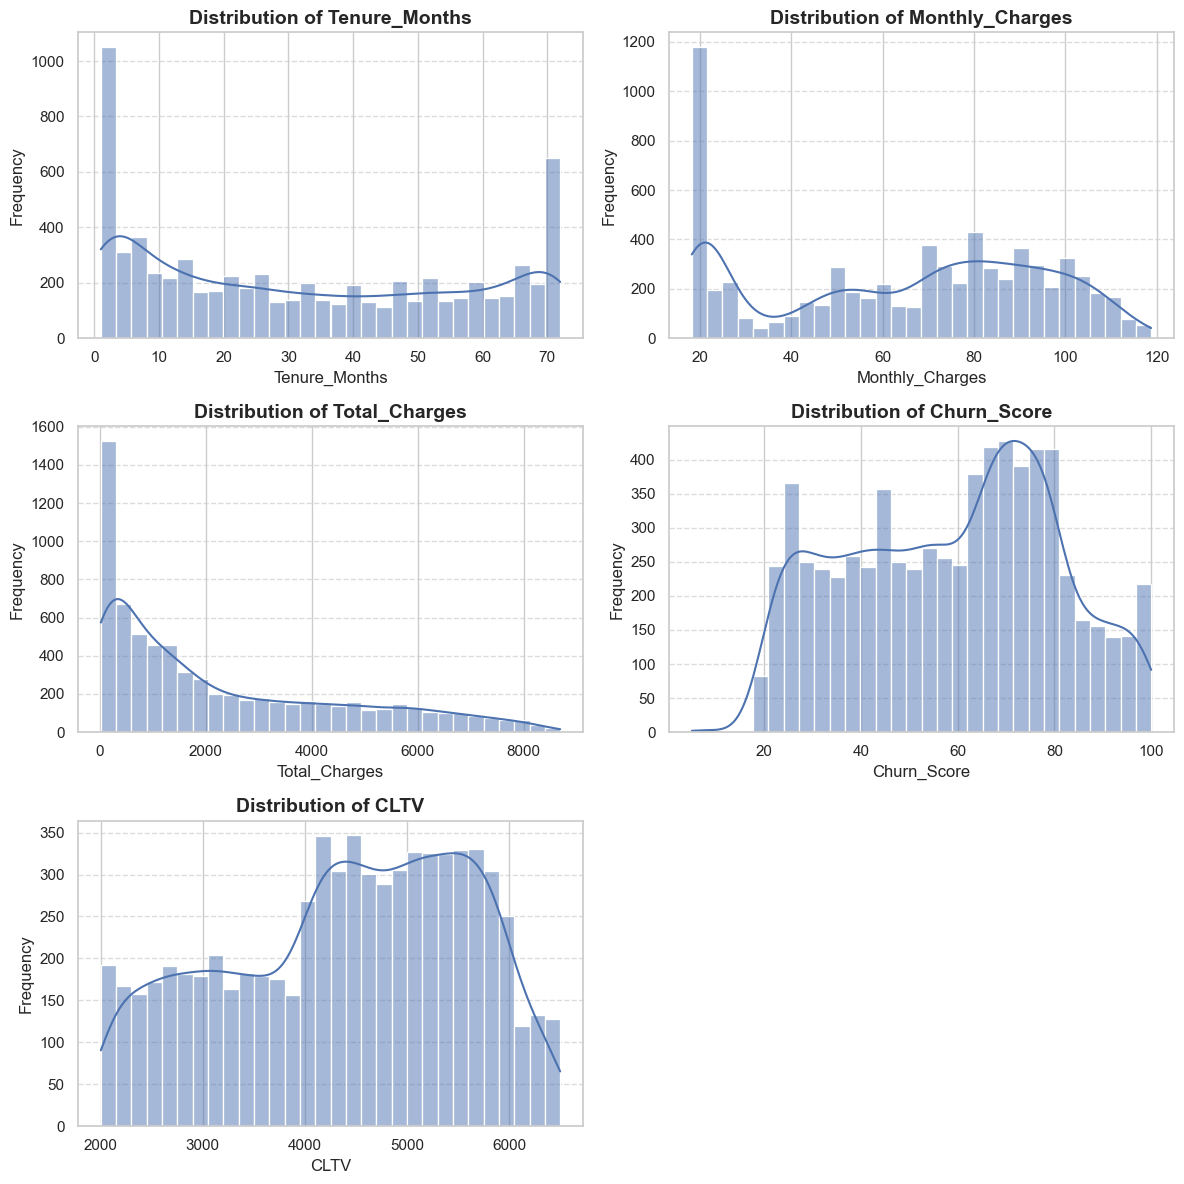

In [9]:
# Columns to plot distributions for
dis_cols = ['Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'Churn_Score', 'CLTV']

def numeric_distribution(df, cols):
    """
    Plots the distribution of each numeric column in the given list.
    
    Parameters:
        df (pd.DataFrame): The dataset
        cols (list): List of numeric column names
    """
    
    # Calculate the number of rows needed for subplots (2 plots per row)
    r_num = math.ceil(len(cols) / 2)
    
    # Create subplots with calculated rows and 2 columns per row
    fig, ax = plt.subplots(r_num, 2, figsize=(12, 4 * r_num))
    ax = ax.flatten()  # Flatten in case of multiple rows for easy indexing
    
    # Loop through each column and plot histogram with KDE
    for i, col in enumerate(cols):
        sns.histplot(df[col].dropna(), kde=True, bins=30, ax=ax[i])
        ax[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        ax[i].set_xlabel(col, fontsize=12)
        ax[i].set_ylabel('Frequency', fontsize=12)
        ax[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Remove empty subplots if the number of columns is odd
    for j in range(i+1, len(ax)):
        fig.delaxes(ax[j])

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    
    # Display the plots
    plt.show()

# Call the function to plot distributions for selected numeric columns
numeric_distribution(df, dis_cols)


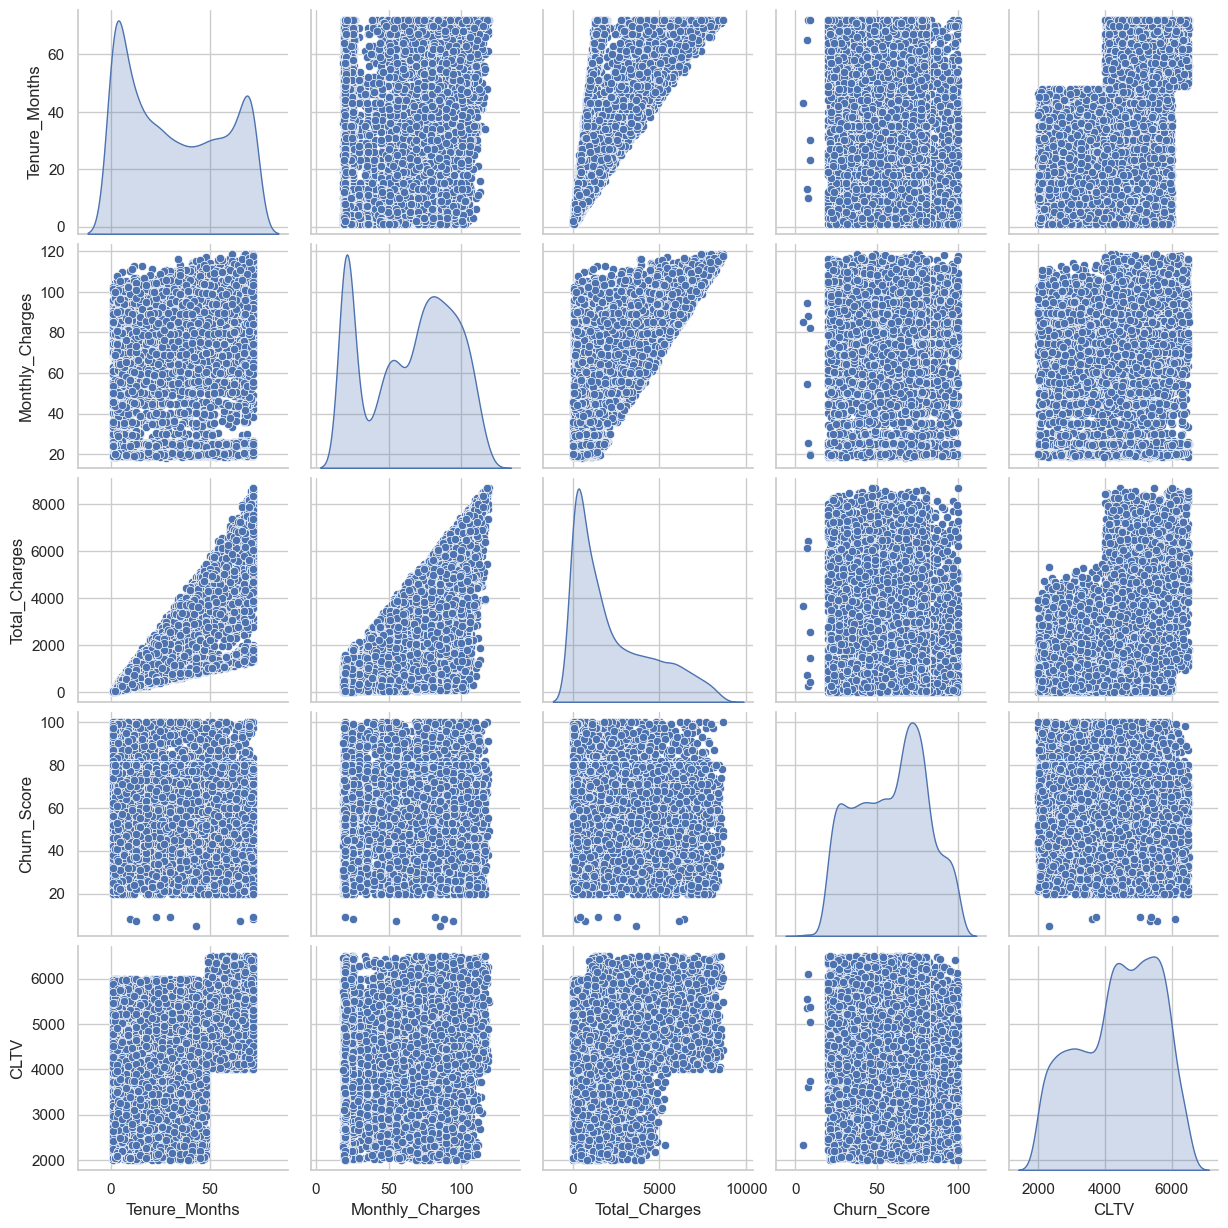

In [10]:
sns.pairplot(df[dis_cols], diag_kind='kde')

In [11]:
df[dis_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure_Months,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
Monthly_Charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
Total_Charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
Churn_Score,7032.0,58.715301,21.531321,5.00,40.0000,61.000,75.0000,100.00
CLTV,7032.0,4401.445108,1182.414266,2003.00,3469.7500,4527.500,5381.0000,6500.00


### Numeric Feature Distribution

- **Tenure:** Many customers are new with short tenure; fewer customers have stayed long-term.  
- **Monthly Charges:** Values are spread widely, with many customers paying mid-to-high monthly fees.  
- **Total Charges:** Strong right skew, many customers have low total charges due to being new or low-usage.  
- **Churn Score:** Most customers fall within the **40–90** range; very low scores are uncommon.  
- **CLTV:** Concentrated mostly between **3500–5500**, indicating moderate customer lifetime value for most customers.

## 10. Outliers

This section identifies outliers in the numeric columns using the IQR method and summarizes the number of lower and upper outliers for each column.

In [12]:
# Automatically select all numeric columns (integers and floats)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize a dictionary to store outlier summaries
outlier_summary = {}

# Loop through each numeric column to calculate outlier statistics
for c in num_cols:
    col = df[c].dropna()  # Exclude missing values for calculation
    Q1 = col.quantile(0.25)  # First quartile
    Q3 = col.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1             # Interquartile range
    lower = Q1 - 1.5 * IQR    # Lower bound for outliers
    upper = Q3 + 1.5 * IQR    # Upper bound for outliers
    n_lower = (col < lower).sum()  # Count of lower outliers
    n_upper = (col > upper).sum()  # Count of upper outliers

    # Store all calculated statistics in the dictionary
    outlier_summary[c] = {
        'Q1': Q1, 
        'Q3': Q3, 
        'IQR': IQR,
        'lower': lower, 
        'upper': upper,
        'n_lower': int(n_lower),
        'n_upper': int(n_upper),
        'n_total': len(col)
    }

# Convert the dictionary to a DataFrame for easier viewing, transposed for readability
pd.DataFrame(outlier_summary).T


,Q1,Q3,IQR,lower,upper,n_lower,n_upper,n_total
Count,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.0,7032.0
Latitude,34.030915,38.227285,4.196370,27.736360,44.521840,0.0,0.0,7032.0
Longitude,-121.815412,-118.043237,3.772175,-127.473674,-112.384975,0.0,0.0,7032.0
Tenure_Months,9.000000,55.000000,46.000000,-60.000000,124.000000,0.0,0.0,7032.0
Monthly_Charges,35.587500,89.862500,54.275000,-45.825000,171.275000,0.0,0.0,7032.0
Total_Charges,401.450000,3794.737500,3393.287500,-4688.481250,8884.668750,0.0,0.0,7032.0
Churn_Value,0.000000,1.000000,1.000000,-1.500000,2.500000,0.0,0.0,7032.0
Churn_Score,40.000000,75.000000,35.000000,-12.500000,127.500000,0.0,0.0,7032.0
CLTV,3469.750000,5381.000000,1911.250000,602.875000,8247.875000,0.0,0.0,7032.0


### Outlier Analysis
Using the IQR method (1.5 × IQR), no numerical column in the dataset contained outliers. All values fell within the calculated upper and lower bounds, indicating that the numerical distributions are fairly well-behaved. Although some variables such as CLTV and Monthly Charges have high values, they do not meet the definition of outliers under the IQR rule.

## 11. Univariate Analysis — Categorical Columns

This section explores the distribution of categorical variables using countplots to understand class frequencies and imbalances.

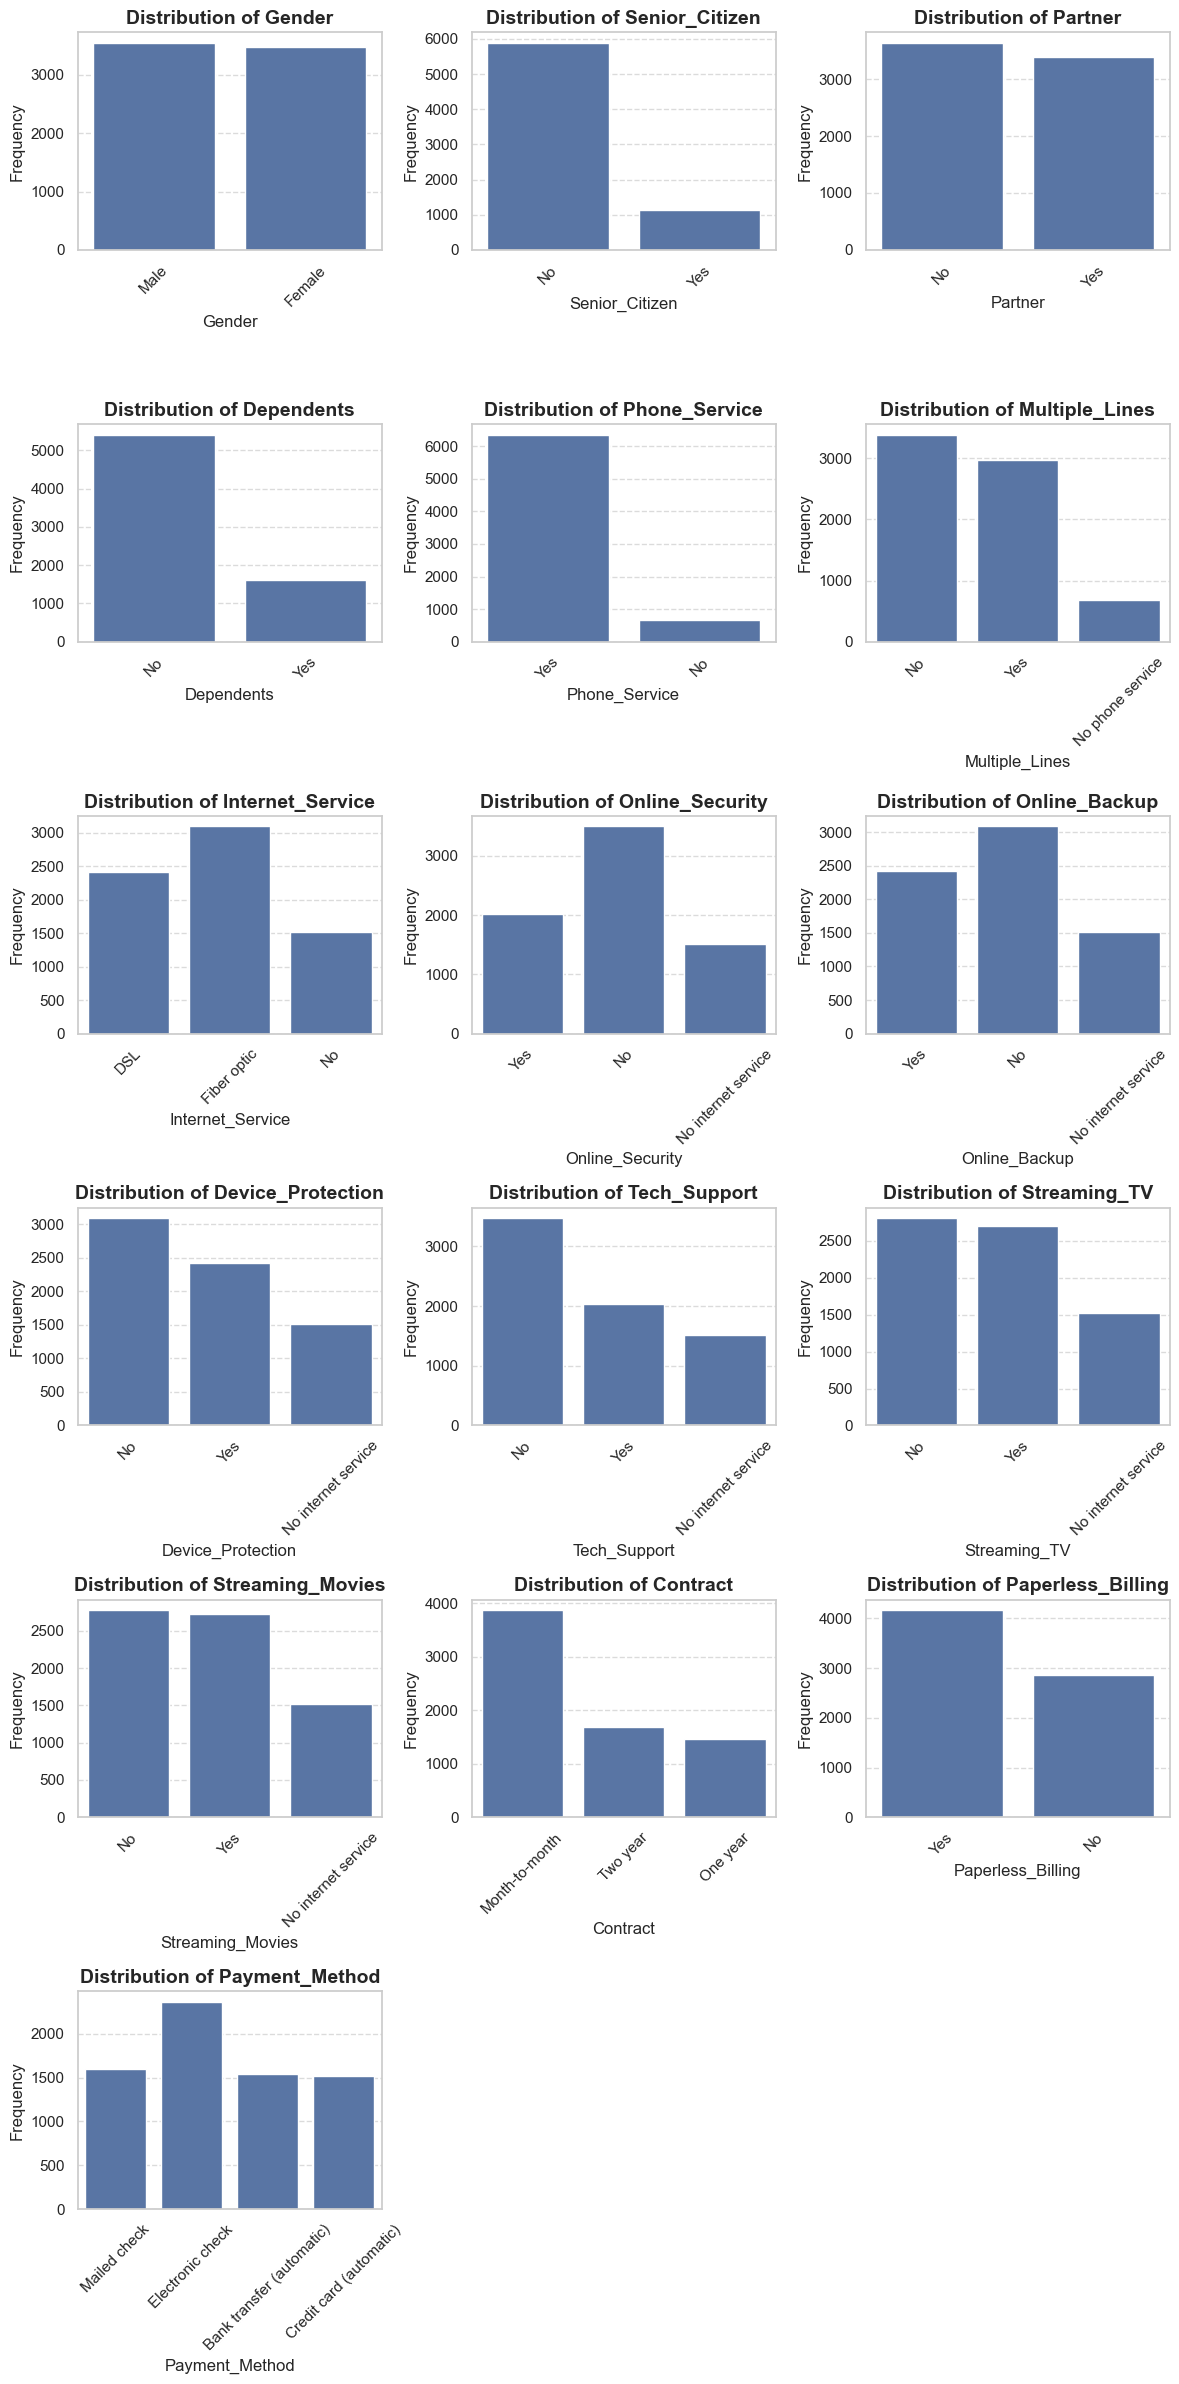

In [13]:
# List of categorical columns to plot count distributions for
count_cols  = ['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service',
               'Multiple_Lines', 'Internet_Service', 'Online_Security',
               'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
               'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method']

def countplot(df, cols):
    """
    Plots count distributions for each categorical column in the given list.
    
    Parameters:
        df (pd.DataFrame): The dataset
        cols (list): List of categorical column names
    """
    
    # Calculate the number of rows needed for subplots (3 plots per row)
    r_num = math.ceil(len(cols) / 3)
    
    # Create subplots with calculated rows and 3 columns per row
    fig, ax = plt.subplots(r_num, 3, figsize=(12, 4 * r_num))
    ax = ax.flatten()  # Flatten for easy indexing
    
    # Loop through each column and plot a countplot
    for i, col in enumerate(cols):
        sns.countplot(x=df[col].dropna(), ax=ax[i])
        ax[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        ax[i].set_xlabel(col, fontsize=12)
        ax[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
        ax[i].set_ylabel('Frequency', fontsize=12)
        ax[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Remove empty subplots if number of columns is not a multiple of 3
    for j in range(len(cols), len(ax)):
        fig.delaxes(ax[j])

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    
    # Display the plots
    plt.show()

# Call the function to plot count distributions for selected categorical columns
countplot(df, count_cols)


### Categorical Feature Distribution — Summary

- **Gender:** Evenly split between male and female customers.  
- **Senior Citizen:** Majority are *not* senior citizens.  
- **Partner & Dependents:** Most customers do **not** have partners or dependents.  
- **Phone Service:** Nearly all customers have phone service; multiple lines usage is moderately split.  
- **Internet Service:** Fiber optic is the most common, followed by DSL; a small portion has no internet service.  
- **Add-On Services:** Most customers do **not** subscribe to online security, backup, device protection, or tech support.  
- **Streaming Services:** Streaming TV and movies are slightly more “No” than “Yes.”  
- **Contract Type:** A large majority are on **month-to-month** contracts.  
- **Billing:** Paperless billing is common but not universal.  
- **Payment Method:** Mixed usage; electronic check appears slightly more common than others.


## 12. Churn Analysis

This section examines the relationship between categorical features and the target variable 'Churn_Label' using countplots with hue to visualize differences between churned and retained customers.

<Axes: xlabel='Churn_Label', ylabel='count'>

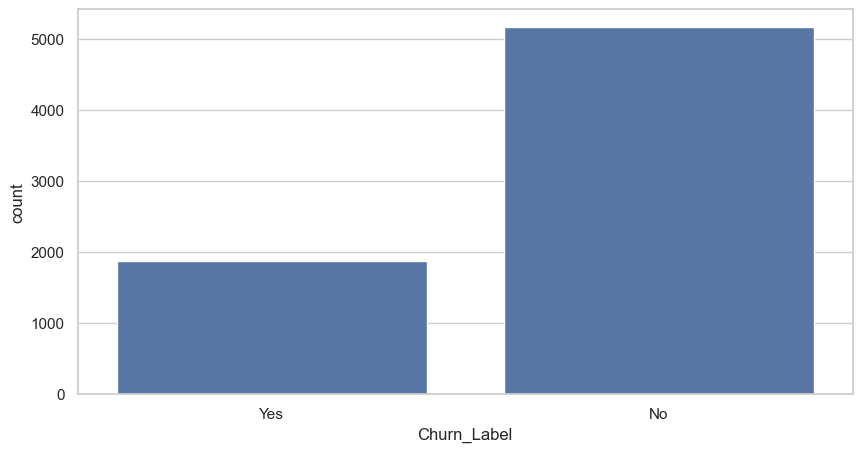

In [14]:
# Count the number of occurrences for each category in 'Churn_Label'
df['Churn_Label'].value_counts()

# Count the occurrences of each category as a proportion of the total
df['Churn_Label'].value_counts(normalize=True)

# Visualize the distribution of 'Churn_Label' using a countplot
sns.countplot(x='Churn_Label', data=df)


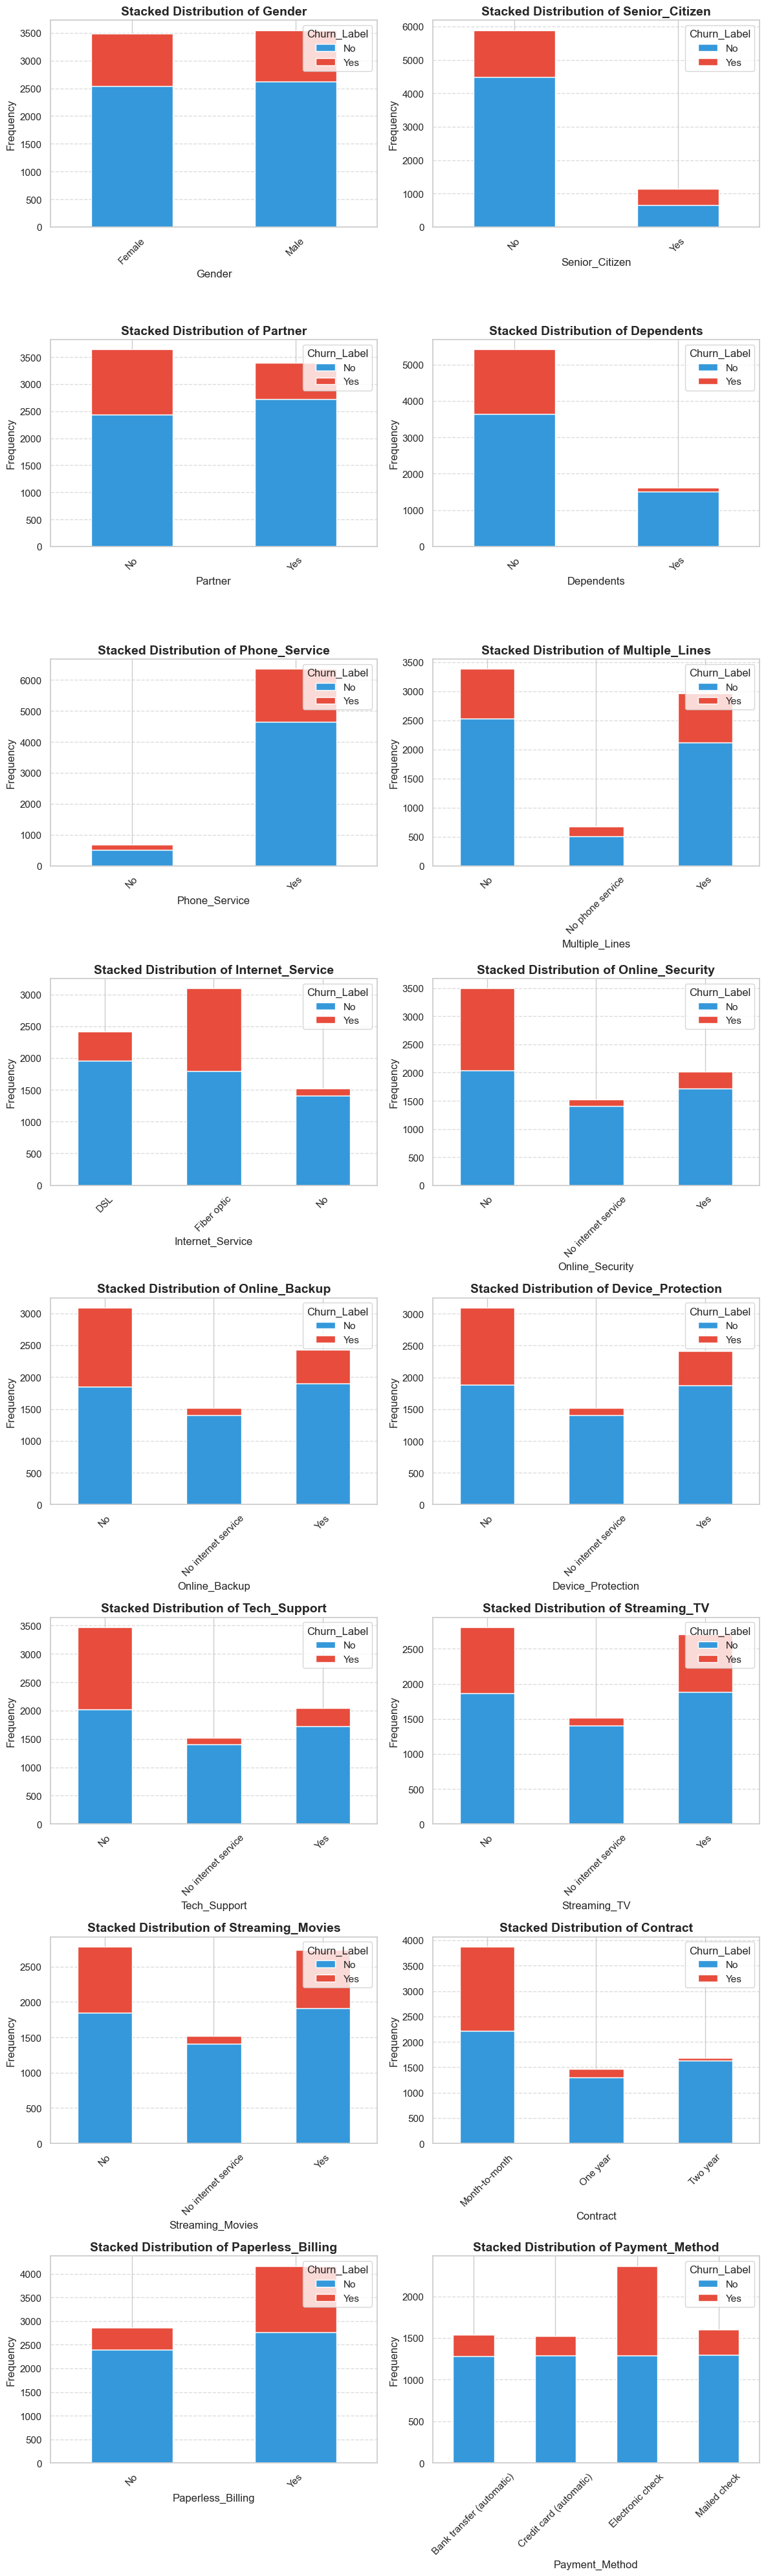

In [16]:

def churnplot_stacked(df, cols, target):
    # Calculate rows (Changed to 2 columns to match your math.ceil logic better)
    r_num = math.ceil(len(cols) / 2)
    fig, ax = plt.subplots(r_num, 2, figsize=(12, 5 * r_num))
    ax = ax.flatten()

    for i, col in enumerate(cols):
        # 1. Create a cross-tabulation of the column and the target
        # This counts occurrences of each target class per category
        ct = pd.crosstab(df[col], df[target])
        
        # 2. Plot directly from the crosstab onto the specific axis
        ct.plot(kind='bar', stacked=True, ax=ax[i], color=['#3498db', '#e74c3c'])
        
        # Formatting
        ax[i].set_title(f'Stacked Distribution of {col}', fontsize=14, fontweight='bold')
        ax[i].set_xlabel(col, fontsize=12)
        ax[i].set_ylabel('Frequency', fontsize=12)
        ax[i].tick_params(axis='x', rotation=45)
        ax[i].legend(title=target, loc='upper right')
        ax[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Clean up empty subplots
    for j in range(len(cols), len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()

# Call the function
churnplot_stacked(df, count_cols, 'Churn_Label')

### Overall Insights from the Plots

### Strongest Churn Drivers
- Senior Citizen  
- Month-to-Month Contracts  
- Fiber Internet Service  
- Lack of Online Security / Backup / Device Protection  

### Moderate Influences
- Having a partner or dependents reduces churn.  
- Payment metho and paperless billing show minor differences.  

### Weak / Negligible Influences
- Gender  
- Basic phone service


## 13. Bivariate Relationships & Correlation Heatmap

This section visualizes the relationships between numeric features using a correlation heatmap, helping to identify highly correlated variables and potential multicollinearity.

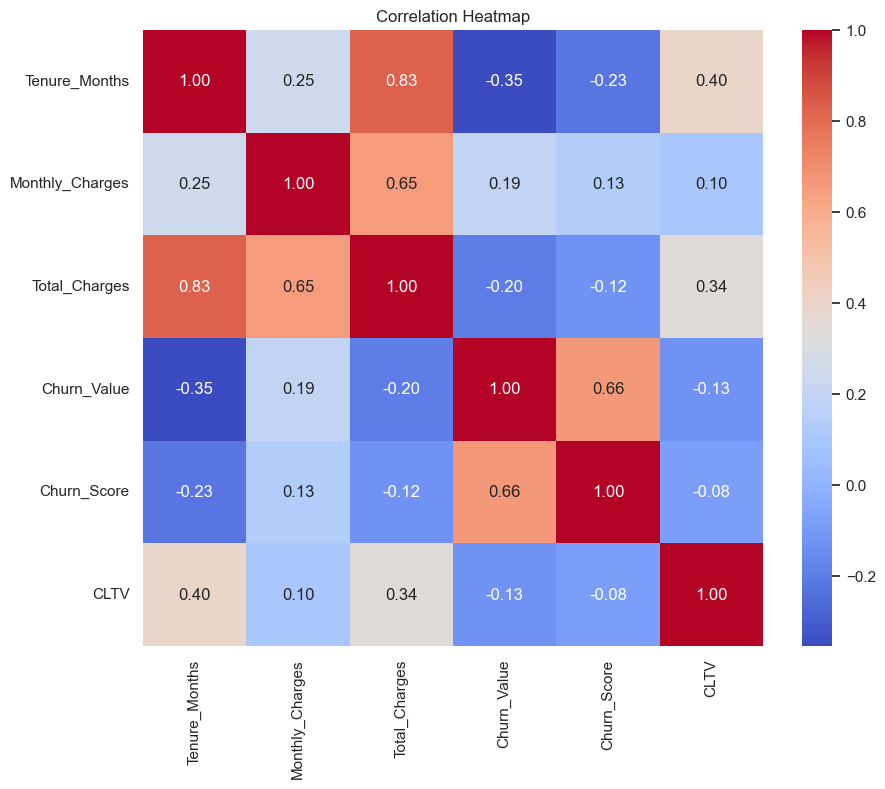

In [37]:
# Set the figure size for the correlation heatmap
plt.figure(figsize=(10, 8))

# Compute correlation matrix for numeric columns, excluding 'Latitude', 'Longitude', and 'Count'
corr = df[numeric_cols].drop(columns=['Latitude', 'Longitude', 'Count']).corr()

# Create a heatmap to visualize correlations, with annotations and a 'coolwarm' color map
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title for the heatmap
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()


In [38]:
# Display the correlation matrix computed for the selected numeric columns
corr

,Tenure_Months,Monthly_Charges,Total_Charges,Churn_Value,Churn_Score,CLTV
Tenure_Months,1.000000,0.246862,0.825880,-0.354049,-0.226379,0.396188
Monthly_Charges,0.246862,1.000000,0.651065,0.192858,0.133556,0.098565
Total_Charges,0.825880,0.651065,1.000000,-0.199484,-0.124312,0.341837
Churn_Value,-0.354049,0.192858,-0.199484,1.000000,0.664970,-0.128253
Churn_Score,-0.226379,0.133556,-0.124312,0.664970,1.000000,-0.080837
CLTV,0.396188,0.098565,0.341837,-0.128253,-0.080837,1.000000


### Correlation Summary (Brief)

- **Tenure** strongly correlates with **Total Charges** and negatively with **Churn**, meaning long-term customers generate more revenue and are less likely to churn.  
- **Monthly Charges** show only a weak correlation with **Churn**, suggesting pricing is not a primary churn driver.  
- **Churn Score** and **Churn Value** correlate well, indicating consistent churn measurement.  
- **CLTV** aligns moderately with **Tenure** and **Total Charges**, but remains a weak predictor of churn.


## 14. Insight Summary — Telco Customer Churn

The Telco customer churn analysis reveals distinct behavioral and service-related patterns that influence customer retention. Most customers have short tenure and moderate lifetime value, while many rely on month-to-month contracts and lack value-added protection services. These characteristics play an important role in churn outcomes.

### Key Churn Drivers

- Senior citizens  
- Customers on month-to-month contracts  
- Fiber-optic internet users  
- Customers without online security, backup, or device protection  

These groups are the most likely to churn. In contrast, households with partners or dependents show slightly higher retention. Gender and basic phone service have minimal impact on churn behavior.

### Revenue and Customer Value Insights

- Tenure strongly correlates with total charges, confirming that long-term customers bring in more revenue and are less likely to churn.  
- Monthly charges show only a weak relationship with churn, suggesting that price dissatisfaction is not the primary driver of customer loss.  
- CLTV has moderate alignment with tenure and total charges but remains a weak predictor of churn risk.

### Data Quality Notes

No outliers were detected in the numerical features, indicating that the dataset is stable and suitable for reliable modeling.

### Overall Takeaway

Contract structure, service add-ons, and customer longevity are the key factors influencing churn. These findings provide a strong foundation for prioritizing retention strategies and developing predictive models to identify high-risk customers effectively.

### Export file

In [43]:
df.to_csv("../data/processed/Telco_Churn_clean.csv", index=False)